# Day 3 Challenge

Youand your friend (let's call him) Kenny, have decided to start an online website that aggregates movie and TV show data, streamed by Netflix.

Kenny finished up with the 2017 releases data and sent it over to you today. You need to import this file to run a quick analysis on the data just like the other data. You notice that the delimiter in this file is different to the 2016 data. Kenny asks if you can merge the datasets together so the data can be uploaded to the website in one file.

Kenny also wants you to analyse the user rating scores of movies over the years to see which year has produced the best movies.

## Summary of Skills Demonstrated
- Importing a delimited file
- Joining datasets
- Filtering datasets
- Understanding variable types
- Graphing with bar chart
---

### Importing Data

Import the `Netflix_2017.txt` file. Save the dataset as `NETFLIX_2017`.

In [31]:
# load modules
import numpy as np
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for creating graphs

# function to read text file
def read_txt(text_file):
    f = open(text_file, 'r')
    data = list(f)
    dataframe = []
    delim = '|' # assign delimiter
    
    # read data and splits each row by a delimiter
    for row in data:
        row = row.split(delim)
        row[-1] = row[-1].strip()
        dataframe.append(row)
    
    # create DataFrame object
    df = pd.DataFrame(dataframe[1:])
    df.columns = dataframe[0]
    
    # change the type of columns
    df.ratingDescription = df.ratingDescription.apply(int)
    df.release_year = df.release_year.str.replace("''",'').astype(int)
    df.user_rating_size = df.user_rating_size.str.replace("''",'').astype(int)
    
    # replaces 'NA' strings with numpy NaN
    for i in range(len(df.user_rating_score)):
        if df.user_rating_score.iloc[i]=='NA':
            df.user_rating_score.iloc[i] = np.nan
        else:
            df.user_rating_score.iloc[i] = float(df.user_rating_score.iloc[i])

    df.user_rating_score = df.user_rating_score.astype(float)
    
    return df

In [35]:
# read dataset
netflix_2017 = read_txt('../datasets/Netflix_2017.txt')

# Display information
netflix_2017.info()

# Display first 3 rows of the dataset
netflix_2017.head(3)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
title                37 non-null object
rating               37 non-null object
ratingLevel          37 non-null object
ratingDescription    37 non-null int64
release_year         37 non-null int64
user_rating_score    16 non-null float64
user_rating_size     37 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ KB


,title,rating,ratingLevel,ratingDescription,release_year,user_rating_score,user_rating_size
0,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
1,Marvel's Iron Fist,TV-MA,,110,2017,98.0,80
2,Santa Clarita Diet,TV-MA,For mature audiences. May not be suitable for...,110,2017,82.0,80


Import the `Netflix_2016.csv` file. Save the dataset as `NETFLIX_2016`

In [36]:
# csv file was encoded as UTF-8 to prevent decoding errors by pandas read_csv function
netflix_2016 = pd.read_csv('../datasets/netflix_2016_encoded.csv', sep='#')

Import the `Netflix_1940_2015.csv` file. Save the dataset as `Netflix_1940_2015`

In [37]:
netflix_1940_2015 = pd.read_csv('../datasets/NETFLIX_1940_2015.csv')

### Joining Datasets
Append the following datasets into one output dataset: `NETFLIX_1940_2015`, `Netflix_2016` and `NETFLIX_2017`. Save the following output data set as `NETFLIX_APPENDED`.
> **Question 1:** *How many observations are in the NETFLIX_APPENDED dataset*?

In [40]:
# appending all three datasets
netflix_appended = netflix_1940_2015.append(netflix_2016).append(netflix_2017)

# Display information
netflix_appended.info()

# Display first 3 rows
netflix_appended.head(3)

,title,rating,ratingLevel,ratingDescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80


In [50]:
# Display number of observations in the netflix_appended dataset
len(netflix_appended)

500

### Filtering Dataset
Filter the `NETFLIX_APPENDED` dataset to show the titles that do not have **NA** as a **user_rating_score**. Output the resulting dataset as NETFLIX_APPENDED_FILTERED.

> **Question 2:** *How many titles in the Netflix_appended do not have a user_rating score of 'NA'*

In [44]:
netflix_appended_filtered = netflix_appended[netflix_appended.user_rating_score.notna()]

In [45]:
# Display number of observations in the netflix_appended dataset
len(netflix_appended_filtered)

256

### Graphing with Bar Chart

Using a bar chart with the `NETFLIX_APPENDED_NUMERIC` dataset as the data source, analyse how the average user_rating_score for movies fluctuates over the years

> **Question 4:** *What is the mean of the year with the highest user_rating_score?*

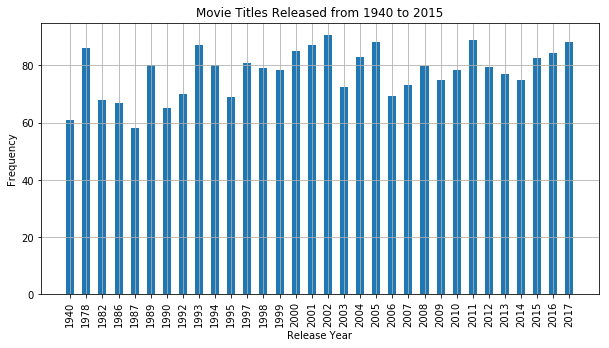

In [46]:
# mean user rating score for movies each year
release_year = netflix_appended_filtered.release_year.unique()
release_year.sort()
mean_movie_year = []
for year in release_year:
    x = netflix_appended_filtered[netflix_appended_filtered.release_year==year]
    x = x.user_rating_score
    mean_movie_year.append(np.mean(x))

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Positions
bar_positions = np.arange(32)

# Height
bar_heights = ax.bar(bar_positions, mean_movie_year, 0.5)

# Set x-axis tick positions
tick_positions = range(0, 32)
ax.set_xticks(tick_positions)
ax.set_xticklabels(release_year, rotation=90)

# Set axes labels
ax.set_xlabel("Release Year")
ax.set_ylabel("Frequency")
ax.set_title('Movie Titles Released from 1940 to 2015')

# Add gridlines and display plot
plt.grid()
plt.show()

In [49]:
dict_mean_year = {}
i = 0
for year in release_year:
    dict_mean_year[year] = mean_movie_year[i]
    i+=1

print((sorted(dict_mean_year.items() , key=lambda x: x[1], reverse=True))[0])

(2002, 90.5)
